In [3]:
import jieba
import math
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def gettext(file_name):
    file = file_name + '.txt'
    #開啟檔案
    text = open(file,"r",encoding="utf-8").read()
    text = text.lower()
    #將特殊符號全部換成空格
    for ch in '!"#$%^&*()+_-,./:;<>?@[]{}\|~，？。':
        text = text.replace(ch,"")
    #計算行數
    line_counter = 0
    text_line = open(file,"r",encoding="utf-8")
    for line in text_line.readlines():
        line_counter += 1
    
    return text,line_counter

In [5]:
def SortandSave(data,num):
    items = list(data.items())
    #將列表按從大到小排序
    items.sort(key=lambda x:x[1],reverse=True)

    word = {}
    count = {}
    save_word = []
    save_count = []
    for i in range(num):
        word[i],count[i]=items[i]
        print((word[i],count[i]))
        save_word.append(word[i])
        save_count.append(count[i])
        
    return save_word,save_count

In [6]:
file_txt,line_counter = gettext("hw1-dataset")
words = jieba.lcut(file_txt)
need_num = 100
counts={}
count_for_all = 0
#統計每個單詞的出現次數
for word in words:
    #print(word)
    counts[word]=counts.get(word,0)+1
    count_for_all += 1

#刪除非文字
exc={"\t","\n"," "}
for word in exc:
    count_for_all -= counts[word]
    del counts[word]

print('counts_words:',count_for_all)
print('counts_lines:',line_counter)
    
TF = {}
for word in counts:
    TF[word] = counts[word] / count_for_all
    
IDF = {}
for word in counts:
    temp = line_counter / counts[word]
    IDF[word] = math.log(temp)

Weight = {}
for word in counts:
    Weight[word] = TF[word] * IDF[word]
    
print('---Counts---')
save_word,save_count = SortandSave(counts,need_num)
    
print('---TF---')
save_TFword,save_TF = SortandSave(TF,need_num)

print('---Weight---')
save_Wword,save_W = SortandSave(Weight,need_num)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\JenMing\AppData\Local\Temp\jieba.cache
Loading model cost 1.209 seconds.
Prefix dict has been built successfully.


counts_words: 6638506
counts_lines: 418202
---Counts---
('的', 317948)
('有', 202918)
('是', 100538)
('沒', 94104)
('嗎', 89832)
('八卦', 79119)
('了', 77366)
('都', 64091)
('你', 63235)
('人', 61125)
('在', 59449)
('什麼', 57846)
('我', 49464)
('就', 47846)
('好', 42717)
('要', 37232)
('不', 37108)
('說', 36723)
('去', 35665)
('台灣', 35511)
('會', 34498)
('跟', 33347)
('怎麼', 33177)
('為', 30823)
('很', 30339)
('被', 29492)
('啊', 28313)
('也', 24675)
('吃', 23965)
('可以', 23236)
('肥宅', 21689)
('是不是', 21560)
('到', 21057)
('想', 20712)
('看', 17235)
('來', 17206)
('真的', 16891)
('錢', 16168)
('後', 16069)
('吧', 15768)
('幹', 15377)
('他', 15143)
('比', 14433)
('知道', 14114)
('才', 13926)
('辦', 13916)
('自己', 13559)
('多', 13269)
('誰', 12946)
('！', 12115)
('不是', 11944)
('上', 11772)
('買', 11263)
('就是', 11021)
('阿', 10932)
('啦', 10896)
('最', 10806)
('不會', 10711)
('如果', 10690)
('現在', 10680)
('對', 10568)
('還是', 10558)
('一個', 10554)
('喔', 10494)
('把', 10363)
('該', 10327)
('中國', 10142)
('一堆', 10098)
('用', 9688)
('有人', 9680)
('這樣', 9666)

In [7]:
def Show_Bar(item_1,item_2,_type):
    plt.figure(_type)
    plt.bar(item_1, height=item_2)
    plt.title('HW1#'+ str(_type))
    plt.xlabel('字詞編號')
    if _type == 1:
        plt.ylabel('權重')
    elif _type == 2:
        plt.ylabel('出現頻率')
    plt.show()

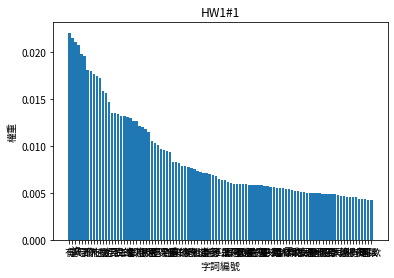

In [8]:
Show_Bar(save_Wword,save_W,1)

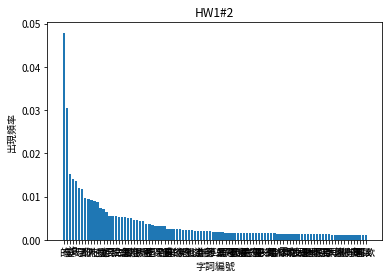

In [9]:
Show_Bar(save_TFword,save_TF,2)